# Análisis exploratorio General

## Análisis inicial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches

In [2]:
# Importamos librerías de análisis de datos
dataframe = pd.read_csv('train.csv')#, index_col='id', parse_dates=['fecha'])

In [3]:
print("Análisis inicial:")
print(f"\nCantidad de filas: {dataframe.shape[0]}")
print(f"\nCantidad de columnas: {dataframe.shape[1]}")
print(f"\nNombres de columnas: {dataframe.columns}")
print("\nContenido de las primeras filas:")
dataframe.head()

Análisis inicial:

Cantidad de filas: 240000

Cantidad de columnas: 23

Nombres de columnas: Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

Contenido de las primeras filas:


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


## Descripción de las variables

|_|Publicación|Tipo|Descripción|
|:-|:-|:-|:-|
|P1|titulo|String|Titulo de la propiedad publicada| 
|P2|descripcion|String|Descripción de la propiedad publicada|
|P3|fecha|Date|Fecha de publicación|
|P4|precio|Float|Valor de la publicación de la propiedad en pesos mexicanos|

|_|Localización | Tipo | Descripción |
|:-|:-|:-|:-|
|L1|direccion|String|Dirección de la propiedad|
|L2|ciudad|String|Ciudad de la propiedad|
|L3|provincia|String|Provincia de la propiedad|
|L4|idzona|Integer|La zona es un valor númerico correspondiente a una parte de la ciudad|
|L5|lat|Float|Latitud geográfica de la propiedad|
|L6|lng|Float|Longitud geográfica de la propiedad|

|_|Caracteristicas Básicas|Tipo|Descripcipción|
|:-|:-|:-|:-|
|B1|tipopropiedad|String|Tipo de propiedad (casa,apartamento,terreno,etc)|
|B2|metrostotales|Integer|Metros totales de la propiedad|
|B3|metroscubiertos|Integer|Metros cubiertos de la propiedad|
|B4|antiguedad|Integer|Antigüedad de la propiedad|
|B5|habitaciones|Integer|Cantidad de habitaciones|
|B6|garages|Integer|Cantidad de garages|
|B7|banos|Integer|Cantidad de baños|

|_|Caracteristicas Adicionales|Tipo|Descripcipción|
|:-|:-|:-|:-|
|A1|gimnasio|Boolean|Indica si la propiedad tiene un gimnasio|
|A2|usosmultiples|Boolean|Indica si la propiedad tiene un SUM|
|A3|piscina|Boolean|Indica si la propiedad tiene una piscina|
|A4|escuelascercanas|Boolean|Indica si la propiedad tiene escuelas cerca|
|A5|centroscomercialescercanos|Boolean|Indica si la propiedad tiene centros comerciales cerca|

## Análisis de datos faltantes

In [4]:
faltantes=pd.DataFrame(dataframe.isnull().sum().sort_values(ascending=False),columns=['nulls'])
filas=len(dataframe)
faltantes['porcentaje']=round(100*faltantes['nulls']/filas,2)
faltantes


,nulls,porcentaje
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


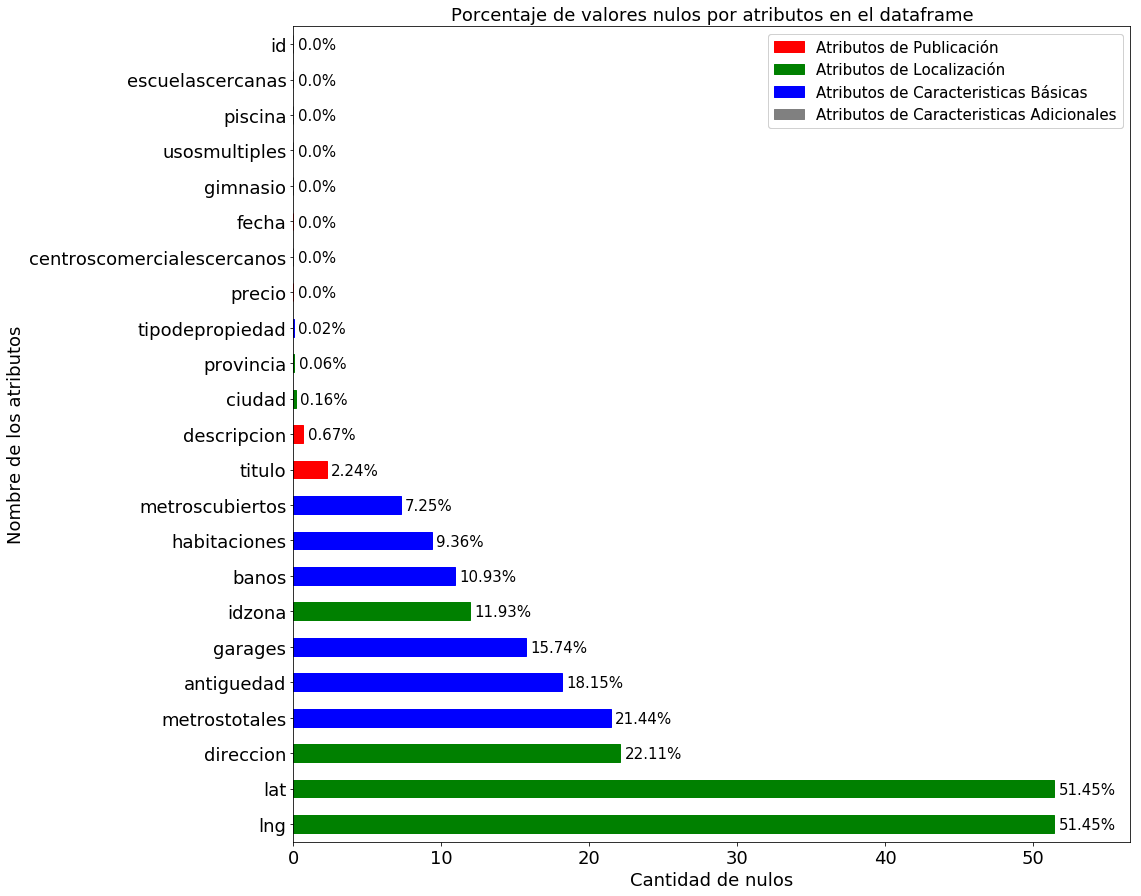

In [5]:
#print(faltantes['porcentaje'][0],'%')
#faltantes['porcentaje'].plot(kind='bar',figsize=(15,5),rot=70,title='Porcentaje de valores nulos por columnas',y='porcentaje')
#colores=['red','red','red','blue','blue','blue','red','blue','blue','blue','green','green','red','red','blue','green','black','green','black','black','black','black','black']
#faltantes['porcentaje'].to_frame().plot.bar(y='porcentaje',figsize=(17,5),rot=70,title='Porcentaje de valores nulos por columnas',color=colores)
faltantes['dato']=faltantes.index

#Hago el gráfico
plot=faltantes['porcentaje'].plot(kind='barh',figsize=(15,15),fontsize=18)
#plot.set_title('¿Cuántos nulos tiene cada columna?',fontSize=18)
plot.set_title('Porcentaje de valores nulos por atributos en el dataframe',fontSize=18)
plot.set_xlabel('Cantidad de nulos',fontSize=18)
plot.set_ylabel('Nombre de los atributos',fontSize=18)
#plot.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55])
#colores=['black','black','black','black','black','green','black','green','blue','red','red','green','green','blue','blue','blue','red','blue','blue','blue','red','red','red']
plot.margins(x=0.1)


#Agrego una leyenda con la simbología usada
patch1 = mpatches.Patch(color='red', label='Atributos de Publicación')
patch2 = mpatches.Patch(color='green', label='Atributos de Localización')
patch3 = mpatches.Patch(color='blue', label='Atributos de Caracteristicas Básicas')
patch4 = mpatches.Patch(color='grey', label='Atributos de Caracteristicas Adicionales')

all_handles = (patch1, patch2, patch3, patch4)

legend = plot.legend(handles=all_handles,fontsize=15)

plot.add_artist(legend)



colores={'titulo':'red','descripcion':'red','fecha':'red','precio':'red',
 'direccion':'green','ciudad':'green','provincia':'green','idzona':'green','lat':'green','lng':'green',
'tipodepropiedad':'blue','metrostotales':'blue','metroscubiertos':'blue','antiguedad':'blue','habitaciones':'blue','garages':'blue','banos':'blue',
'gimnasio':'grey','usosmultiples':'grey','piscina':'grey','escuelascercanas':'grey','centroscomercialescercanos':'grey','id':'grey'}

#Voy agregando para cada barra el porcentaje que representa y el color que le corresponde
for index,item in enumerate(plot.patches):
    plot.text(item.get_width()+.3,item.get_y()+.1,str(faltantes['porcentaje'][index])+'%',fontsize=15)
    item.set_color(colores[faltantes['dato'][index]])
    #item.set_color(colores[index])

* Análizando el porcentaje de datos faltantes se puede observar una cantidad demasiado grande de faltantes para los datos de longitud y latitud (faltan más de la mitad de los datos).

* Habrá que tener en cuenta que el peso de estos faltantes es muy grande, y las desiciones que se tomen con estos datos pueden influir mucho en el trabajo de análisis.

* También hay muchos datos faltantes de dirección y metros totales (aunque algo menor, solo un 20% aproximadamente)

* Se puede observar que hay más datos con faltantes pero el porcentaje es menor al 20%, lo cual es un numero más razonable.

In [6]:
# Función para realizar un gráfico de caja (el cual muestra el máximo, mínimo, mediana, cuartiles y outliers)

def boxplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    medianprops = dict(linestyle='-', linewidth=4, color='k')
    plot= datos.plot(kind='box',figsize=tamanio,fontsize=18,color=color,medianprops=medianprops)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)

In [7]:
#Función para realizar un gráfico de barras horizontales con datos de series

def hbarplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_width()+.3,item.get_y()+.1,str(datos.iloc[index]),fontsize=15)

In [8]:
#Función para realizar un gráfico de barras verticales con datos de series

def barplot(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='bar',figsize=tamanio,fontsize=18,color=color)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)
    plot.margins(x=0.1)
    for index,item in enumerate(plot.patches):
        plot.text(item.get_x()-.03, item.get_height()+.5,str(datos.iloc[index]),fontsize=15)

In [9]:
#Función para realizar un histograma con datos de series

def hist(datos,color,titulo,etiqueta_x,etiqueta_y,tamanio=(15,15)):
    plot=datos.plot(kind='hist',figsize=tamanio,fontsize=18,color=color,bins=80)
    plot.set_title(titulo,fontSize=18)
    plot.set_xlabel(etiqueta_x,fontSize=18)
    #plt.xticks(rotation='horizontal')
    plot.set_ylabel(etiqueta_y,fontSize=18)
    

## Análisis de los atributos de Publicación

### Análisis del atributo titulo

In [10]:
dataframe['titulo'].value_counts()

casa en venta                                                                       468
departamento en venta                                                               289
casa en venta en chihuahua                                                          268
casa en venta en querétaro                                                          238
departamento en venta en benito juárez                                              221
departamento en venta en miguel hidalgo                                             177
casa en venta en mérida                                                             167
casa en venta                                                                       132
casa en venta en torreón                                                            119
casa en venta en monterrey                                                          115
casa en venta en mérida, yucatán                                                    115
casa en venta en puebla         

In [11]:
dataframe['titulo'].describe()

count            234613
unique           186191
top       casa en venta
freq                468
Name: titulo, dtype: object

* Hay 234613 titulos de publicaciones
* El titulo más utilizado es "casa en venta", la cual se utiliza en 468 publicaciones
* Hay gran cantidad de titulos que solo aparecen en una sola publicación

### Análisis del atributo descripcion

In [12]:
dataframe['descripcion'].value_counts()

empresa dedicada a los   ante notario y registro público tiene grandes oportunidades para ti desde un 50-70% debajo de su avalúo, cesiones de derechos con garantia hipotecaria en buenas condiciones en venta únicamente de contado no creditos. si no sabes que es un remate hipotecario no te preocupes nosotros te explicamos. inversión segura, pago de contado. \n\n* las imágenes y descripción aquí presentadas pueden no representar con exactitud la realidad por tener diferencias en relación con la numeración, ubicación y superficies.  (r) no es inmobiliaria sino media derechos crediticios litigiosos y/o adjudicatarios.                                                                                                                                                                                                                                                                                                                                                                                            

In [13]:
dataframe['descripcion'].describe()

count                                                238381
unique                                               232187
top       empresa dedicada a los   ante notario y regist...
freq                                                    119
Name: descripcion, dtype: object

* Hay 238381 descripciones de publicaciones
* La descripción más utilizado es "empresa dedicada a los   ante notario y regitro público ...", la cual se utiliza en 119 publicaciones
* Hay gran cantidad de descricpiones que solo aparecen en una sola publicación

### Análisis del atributo fecha

In [14]:
dataframe['fecha'].min()

'2012-01-01 00:00:00'

In [15]:
dataframe['fecha'].max()

'2016-12-31 00:00:00'

* Las fechas de publicación van del primero de enero de 2012 al 31 de diciembre de 2016, es decir las publicaciones corresponden a un intervalo de 5 años

### Análisis del atributo precio

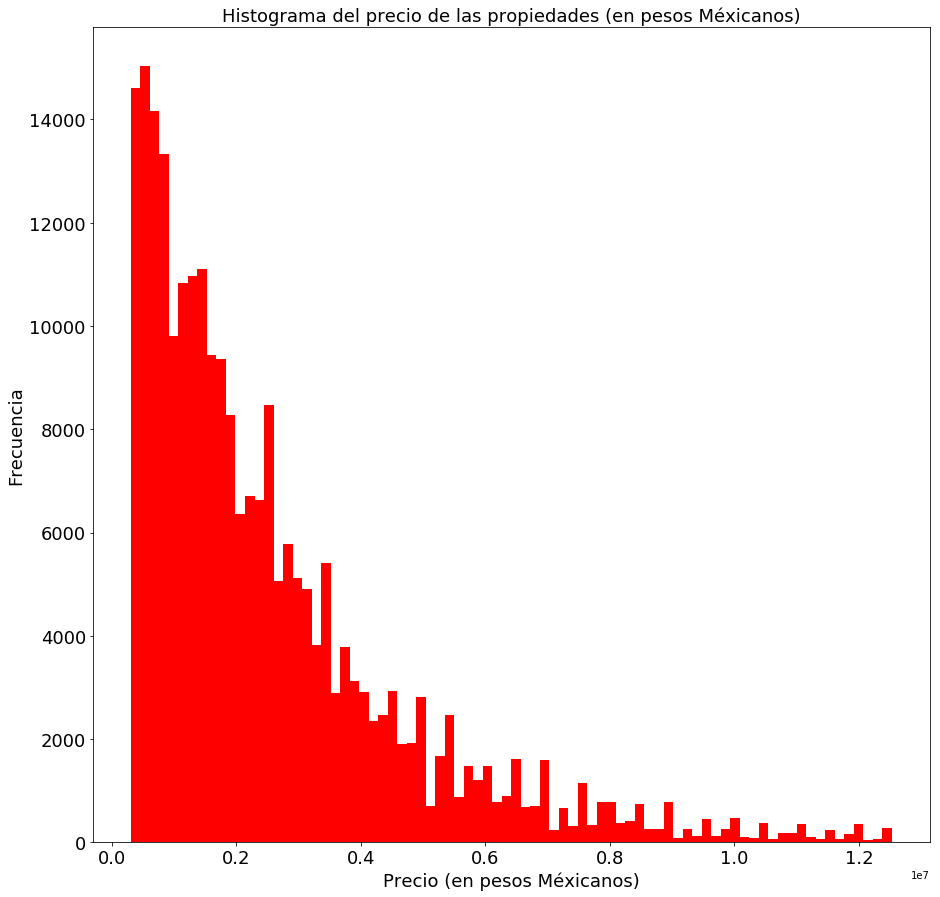

In [16]:
precios=dataframe['precio']
precios
hist(datos=precios,color='red',titulo='Histograma del precio de las propiedades (en pesos Méxicanos)',etiqueta_x='Precio (en pesos Méxicanos)',etiqueta_y='Frecuencia')

Del análisis del gráfico se puede observar que: 
* La mayoría de las propiedades valen menos de 5000000, pero hay los valores de algunas propiedades que pueden llegar a vale 12000000
* El gráfico presenta una cola larga hacia la derecha

## Análisis de los atributos de Localización

### Análisis del atributo direccion

In [17]:
dataframe['direccion'].str.upper().value_counts().head(50)

-                                                          660
.                                                          476
CALLE                                                      354
1                                                          212
JURIQUILLA                                                 183
DOMICILIO CONOCIDO                                         175
CENTRO                                                     168
EL REFUGIO                                                 161
NORTE DE MÉRIDA                                            137
CUMBRES DEL LAGO                                           135
X                                                          131
X #X                                                       123
LOMAS DE ANGELOPOLIS                                       115
0                                                          113
BENITO JUAREZ                                              109
SIN NOMBRE                                             

* En muchas publicaciones aparecen direcciones que no parecen aportar información. Por ejemplo aparecen: 660 publicaciones con dirección "-", 476 con dirección "." y 354 con dirección "Calle"


### Análisis del atributo ciudad

In [18]:
dataframe['ciudad'].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
Monterrey                         6946
Alvaro Obregón                    6633
Cuauhtémoc                        6614
Naucalpan de Juárez               6554
Miguel Hidalgo                    5795
Atizapán de Zaragoza              5783
Tlalpan                           5721
Huixquilucan                      5718
Coyoacán                          5293
Puebla                            4636
Guadalajara                       4006
San Andrés Cholula                3805
Cancún                            3779
Cuernavaca                        3775
Chihuahua                         3757
Tlalnepantla de Baz               3588
Cuautitlán Izcalli                3408
Tlajomulco de Zúñiga              3254
Gustavo A. Madero                 3141
Iztapalapa                        3093
Cuajimalpa de Morelos    

In [19]:
dataframe['ciudad'].describe()

count        239628
unique          875
top       Querétaro
freq          12646
Name: ciudad, dtype: object

* Las propiedades se ubican 875 ciudades diferentes
* La ciudad con más propiedades es Querétaro, con 12646 propiedades
* Hay gran cantidad de ciudades con una sola propiedad

### Análisis del atributo provincia

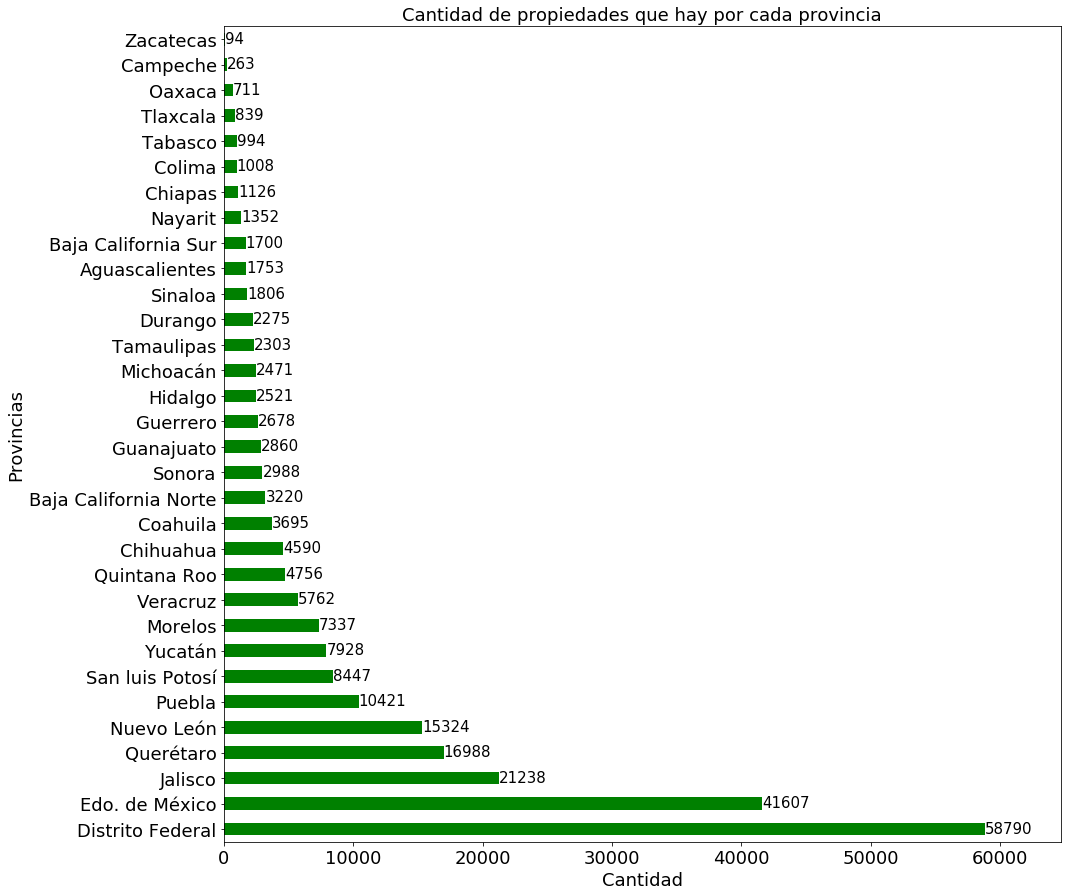

In [20]:
canprovincias=dataframe['provincia'].value_counts()
hbarplot(datos=canprovincias,color='green',titulo='Cantidad de propiedades que hay por cada provincia',etiqueta_x='Cantidad',etiqueta_y='Provincias')


* Del análisis del gráfico se puede observar que la mayor cantidad de propiedades se encuentran en el Distrito Federal (58790 propiedades), seguida de las que se encuentran en el Estado de México(416007). El Distrito Federal es la capital del pais, y el Estado de México limita con el Distrito Federal, siendo estas dos las provincias más pobladas del país. (fuente: https://es.wikipedia.org/wiki/Anexo:Entidades_federativas_de_M%C3%A9xico_por_superficie,_poblaci%C3%B3n_y_densidad)


*  Luego la tercer provincia con más propiedades es Jalisco, pero los valores comienzan a caer a cifras mucho más pequeñas (Jalisco posee 21238 propiedades)


* La provincia con menos propiedades es Zacatecas, que solo posee 94 propiedades

### Análisis del atributo idzona

In [21]:
dataframe.loc[:,['idzona']].describe()

,idzona
count,2.113790e+05
mean,2.423468e+06
std,1.056794e+07
min,2.200000e+01
25%,2.489000e+04
50%,5.638300e+04
75%,8.783800e+04
max,5.000400e+07


* Las propiedades se ubican en zonas que van entre el valor 22 y el valor 50004000. En promedio se ubican en la zona 2423468 

### Análisis del atributo lat

In [22]:
dataframe.loc[:,['lat']].describe()

,lat
count,116512.000000
mean,20.696818
std,3.137884
min,-100.886679
25%,19.359846
50%,19.543273
75%,20.740005
max,83.026219


* Las propiedades se ubican en latitudes entre -100.886679  y 83.026219. En promedio se ubican en la latitud 20.696818 

### Análisis del atributo lng

In [23]:
dataframe.loc[:,['lng']].describe()

,lng
count,116512.000000
mean,-99.509221
std,9.744143
min,-125.859375
25%,-100.977908
50%,-99.240387
75%,-99.134777
max,121.036000


* Las propiedades se ubican en longitudes entre -125.859375  y 121.036000. En promedio se ubican en la longitud -99.509221 

## Análisis de los atributos de Caracteristicas Básicas

### Análisis del atributo tipodepropiedad

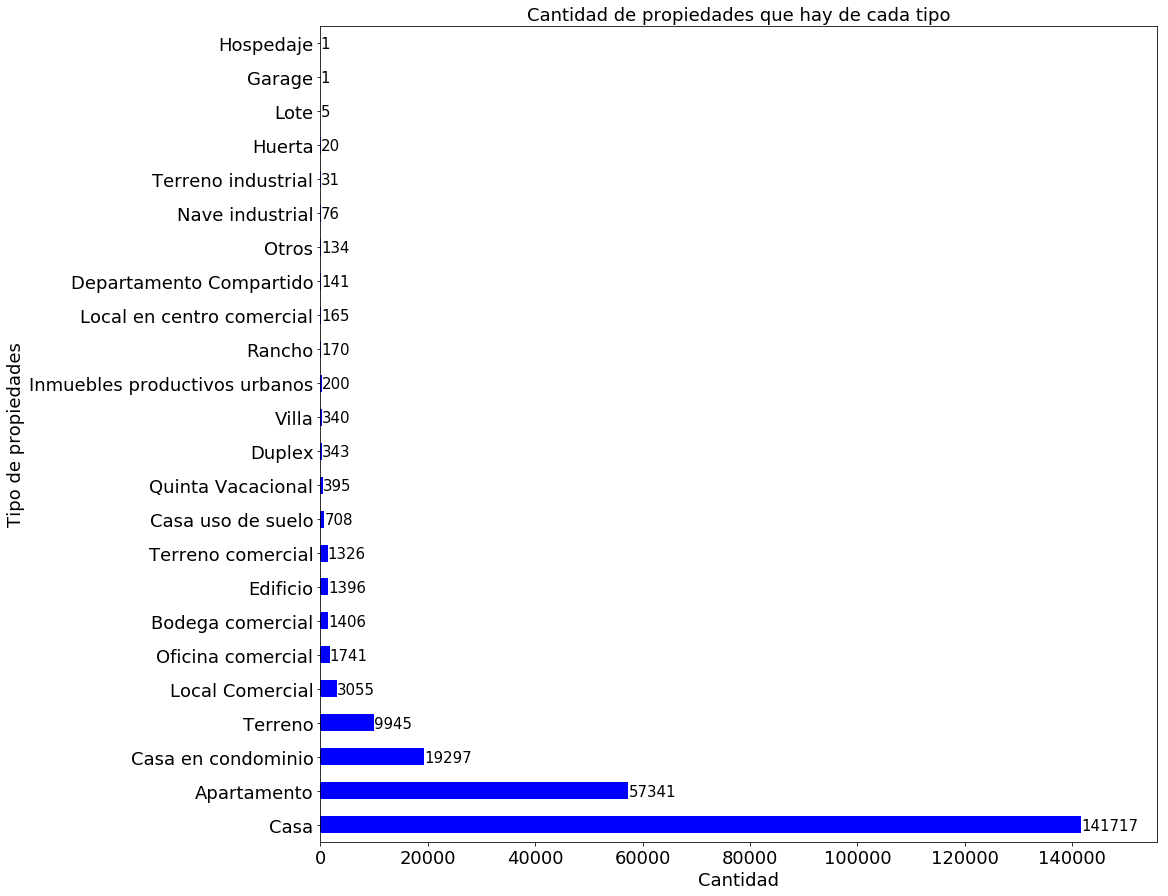

In [24]:
cantipopropiedades=dataframe['tipodepropiedad'].value_counts()
hbarplot(datos=cantipopropiedades,color='blue',titulo='Cantidad de propiedades que hay de cada tipo',etiqueta_x='Cantidad',etiqueta_y='Tipo de propiedades')


* Del análisis del gráfico se puede observar que la mayor parte de las propiedades son Casas (141717), seguida por los Apartamentos (57341)

*  Luego siguen las Casas en condominio (habiendo 19297 publicaciones), pero los valores comienzan a caer a cifras mucho más pequeñas

* Se puede observar que solo hay una propiedad que sea Garage y una sola que es Hospedaje

### Análisis de los atributos metrostotales y metroscubiertos

In [25]:
dataframe.loc[:,['metrostotales','metroscubiertos']].describe()

,metrostotales,metroscubiertos
count,188533.000000,222600.000000
mean,176.765145,174.016774
std,94.427328,98.152950
min,15.000000,15.000000
25%,102.000000,90.000000
50%,155.000000,153.000000
75%,238.000000,240.000000
max,439.000000,439.000000


In [26]:
dataframe.loc[:,['metrostotales','metroscubiertos']].median()

metrostotales      155.0
metroscubiertos    153.0
dtype: float64

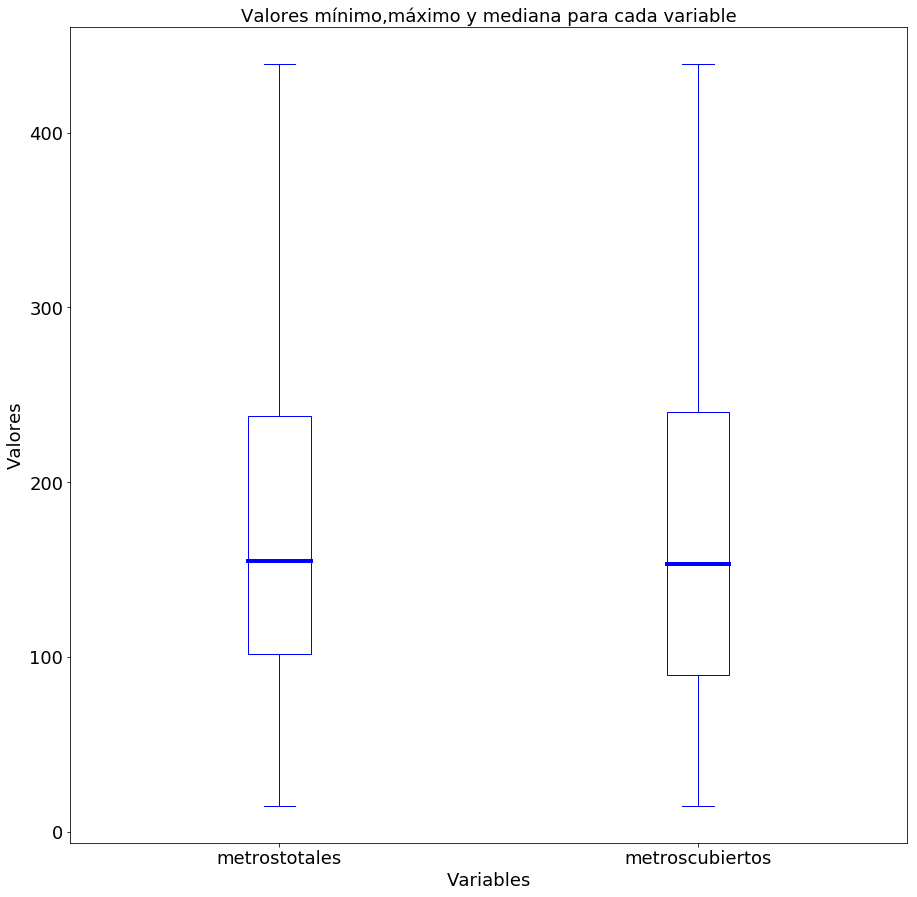

In [27]:
cantmetros=dataframe.loc[:,['metrostotales','metroscubiertos']]
boxplot(datos=cantmetros,color='blue',titulo='Valores mínimo,máximo y mediana para cada variable',etiqueta_x='Variables',etiqueta_y='Valores')


Del análisis del gráfico se puede observar que las variables tienen distribuciones muy similares:

* La variable metrostotales tiene un mínimo que vale 15, un máximo que vale 439, la mediana que vale 155 y no presentan outliers

* La variable metroscubiertos tiene un mínimo que vale 15, un máximo que vale 439, la mediana que vale 153 y no presentan outliers

### Análisis del atributo antiguedad

In [28]:
dataframe.loc[:,['antiguedad']].describe()

,antiguedad
count,196445.000000
mean,8.116114
std,9.553830
min,0.000000
25%,0.000000
50%,5.000000
75%,10.000000
max,80.000000


In [29]:
dataframe.loc[:,['antiguedad']].median()

antiguedad    5.0
dtype: float64

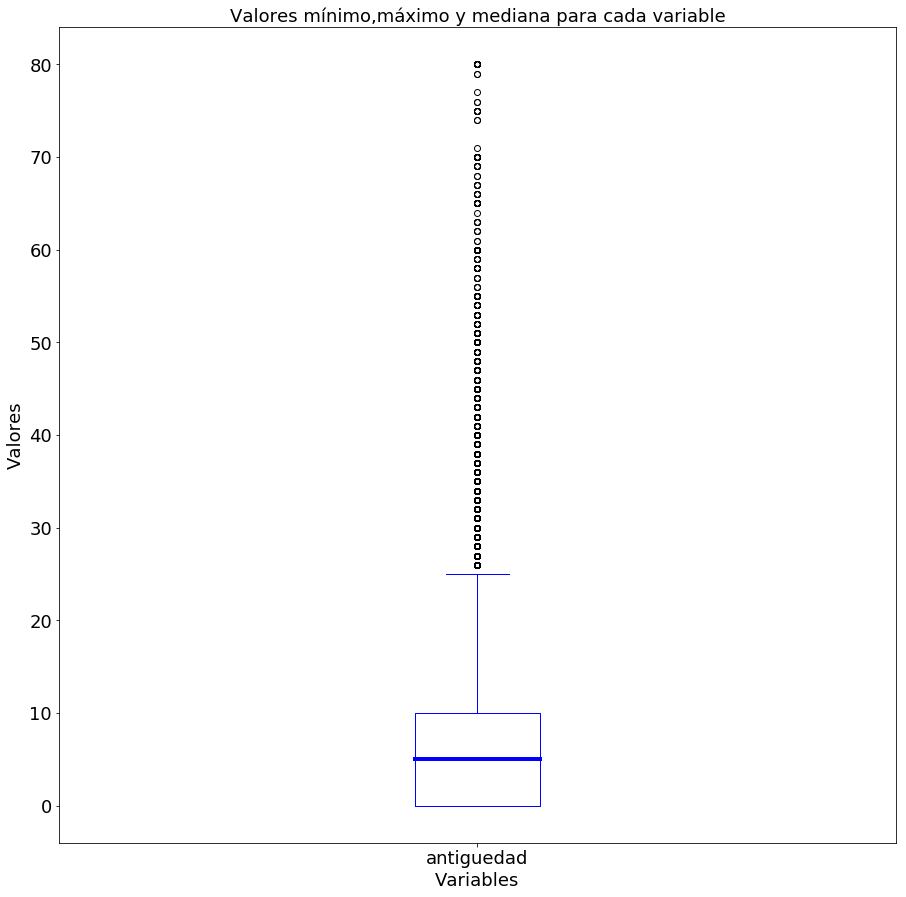

In [30]:
cantmetros=dataframe.loc[:,['antiguedad']]
boxplot(datos=cantmetros,color='blue',titulo='Valores mínimo,máximo y mediana para cada variable',etiqueta_x='Variables',etiqueta_y='Valores')


Del análisis del gráfico se puede observar que:

* Las propiedades suelen tener entre 0 y 25 años de antiguedad y en muy pocos casos llegan a tener de 25 a 80 años. En promedio tienen 5 años de antiguedad.

### Análisis de los atributos habitaciones,garages y banos

In [31]:
dataframe.loc[:,['habitaciones','garages','banos']].describe()

,habitaciones,garages,banos
count,217529.000000,202235.000000,213779.000000
mean,2.902326,1.546874,2.132417
std,0.896894,0.853507,0.912546
min,1.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,2.000000
75%,3.000000,2.000000,3.000000
max,10.000000,3.000000,4.000000


In [32]:
dataframe.loc[:,['habitaciones','garages','banos']].median()

habitaciones    3.0
garages         2.0
banos           2.0
dtype: float64

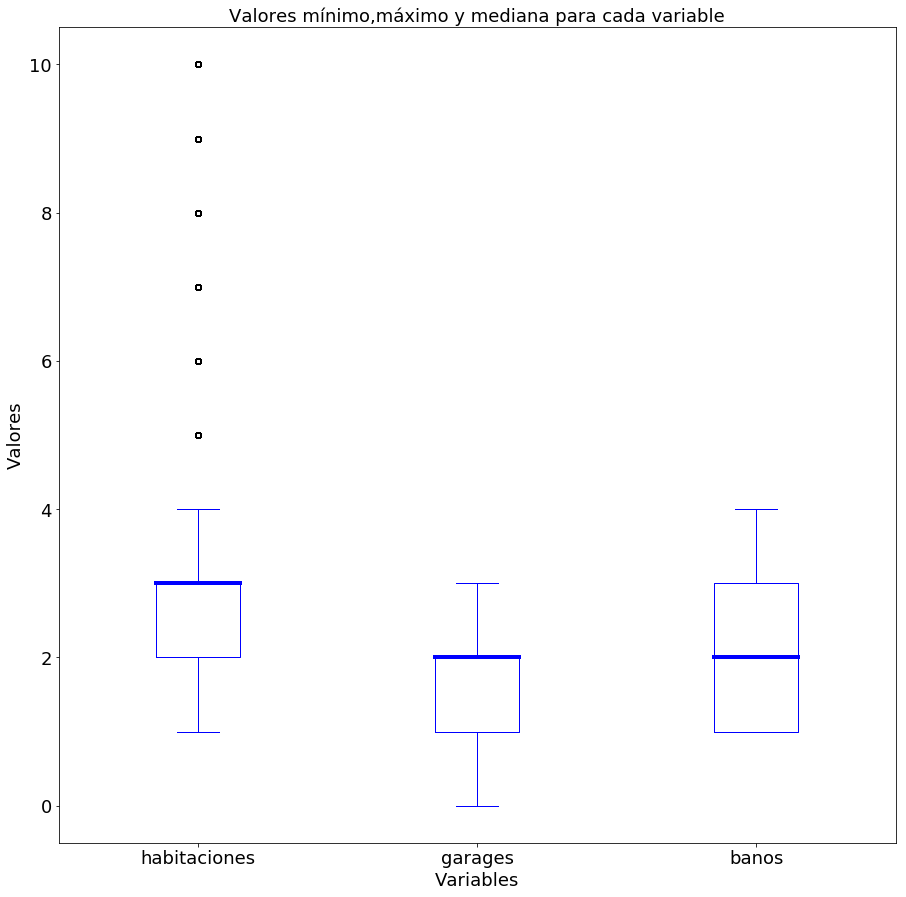

In [33]:
cantmetros=dataframe.loc[:,['habitaciones','garages','banos']]
boxplot(datos=cantmetros,color='blue',titulo='Valores mínimo,máximo y mediana para cada variable',etiqueta_x='Variables',etiqueta_y='Valores')


Del análisis del gráfico se puede observar que:

* Las propiedades suelen tener entre 1 y 4 habitaciones y en muy pocos casos llegan a tener de 5 a 10 habitaciones. En promedio tienen 3 habitaciones.

* Las propiedades suelen tener como mínimo 0 garages, como máximo 3 garages y en promedio 2 garages.

* Las propiedades suelen tener como mínimo 1 baño, como máximo 4 baños y en promedio 2 baños.

## Análisis de los atributos de Caracteristicas Adicionales

In [34]:
remplazo={0.0: 'no', 1.0: 'si'}
dataframe=dataframe.replace({'gimnasio': remplazo,'usosmultiples': remplazo,'piscina': remplazo,'escuelascercanas': remplazo,'centroscomercialescercanos': remplazo})

### Análisis del atributo gimnasio

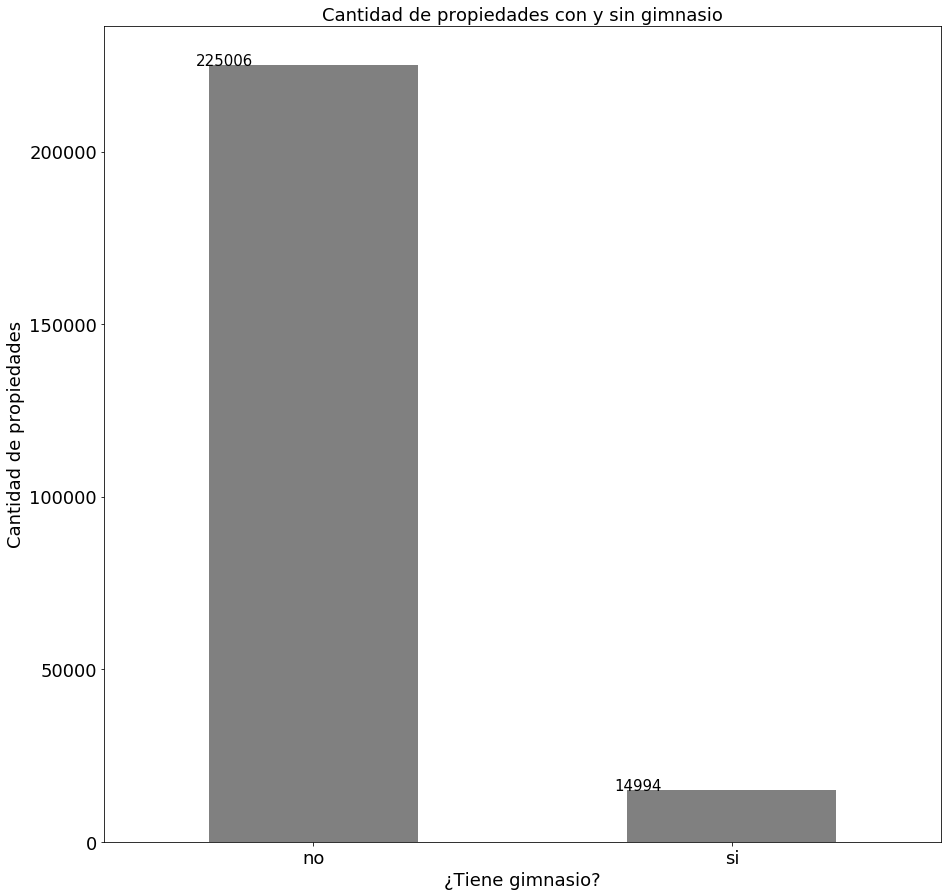

In [35]:
cantgym=dataframe['gimnasio'].value_counts()
barplot(datos=cantgym,color='grey',titulo='Cantidad de propiedades con y sin gimnasio',etiqueta_x='¿Tiene gimnasio?',etiqueta_y='Cantidad de propiedades')


* Del análisis del gráfico se puede observar que la mayoria de las propiedades no tiene Gimnasio. Hay 225006 propiedades con Gimnasio y 14994 que no tienen Gimnasio.

### Análisis del atributo usosmultiples

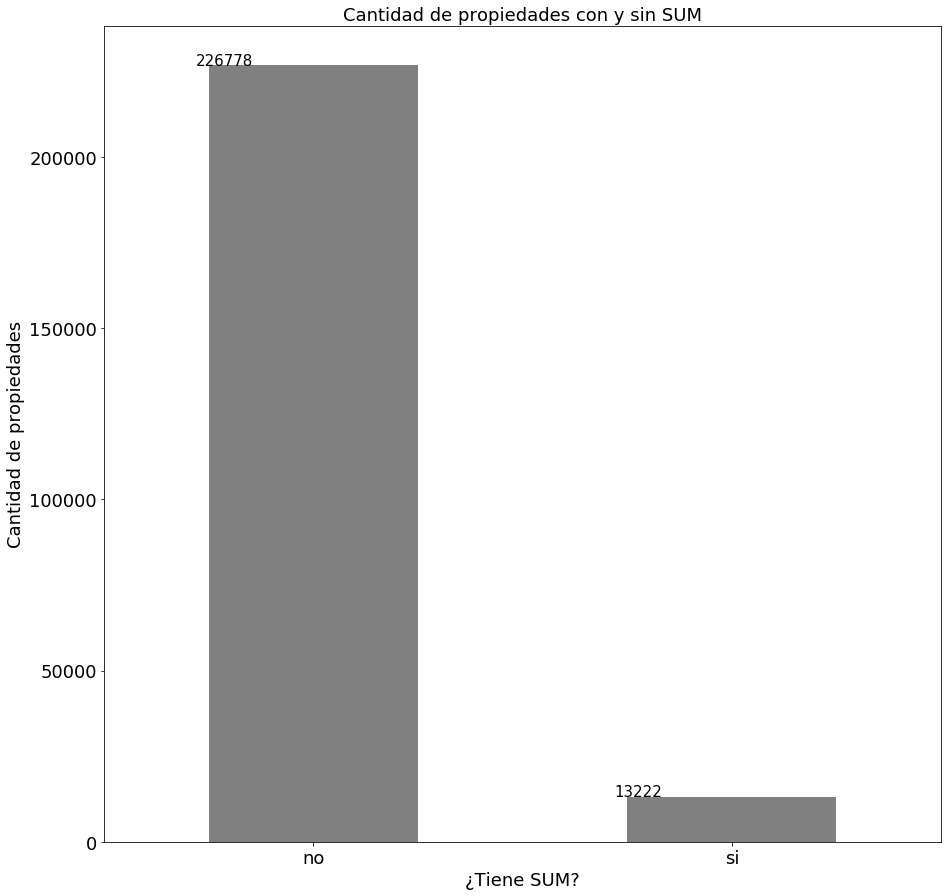

In [36]:
cantSUM=dataframe['usosmultiples'].value_counts()
barplot(datos=cantSUM,color='grey',titulo='Cantidad de propiedades con y sin SUM',etiqueta_x='¿Tiene SUM?',etiqueta_y='Cantidad de propiedades')


* Del análisis del gráfico se puede observar que la mayoria de las propiedades no tiene Salón de Usos Múltiples (SUM). Hay 226778 propiedades con SUM y 13222 que no tienen SUM.

### Análisis del atributo piscina

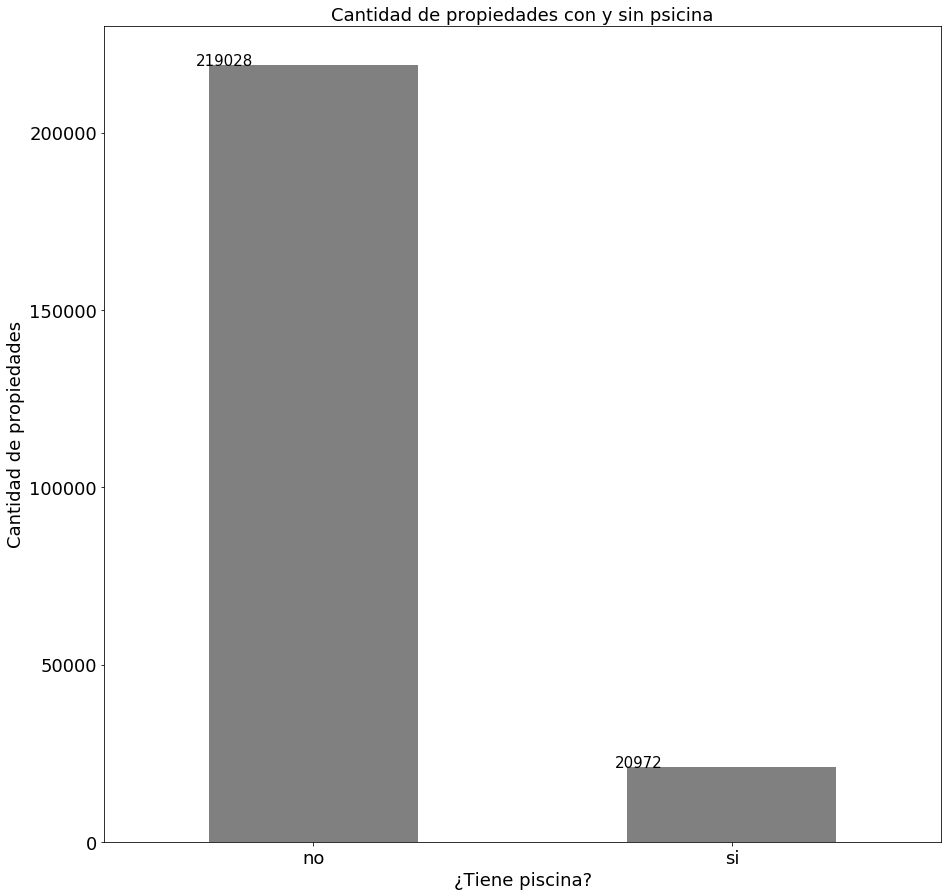

In [37]:
cantpiscina=dataframe['piscina'].value_counts()
barplot(datos=cantpiscina,color='grey',titulo='Cantidad de propiedades con y sin psicina',etiqueta_x='¿Tiene piscina?',etiqueta_y='Cantidad de propiedades')


* Del análisis del gráfico se puede observar que la mayoria de las propiedades no tiene Psicina. Hay 219028 propiedades con Piscina y 20972 que no tienen Piscina.

### Análisis del atributo escuelascercanas

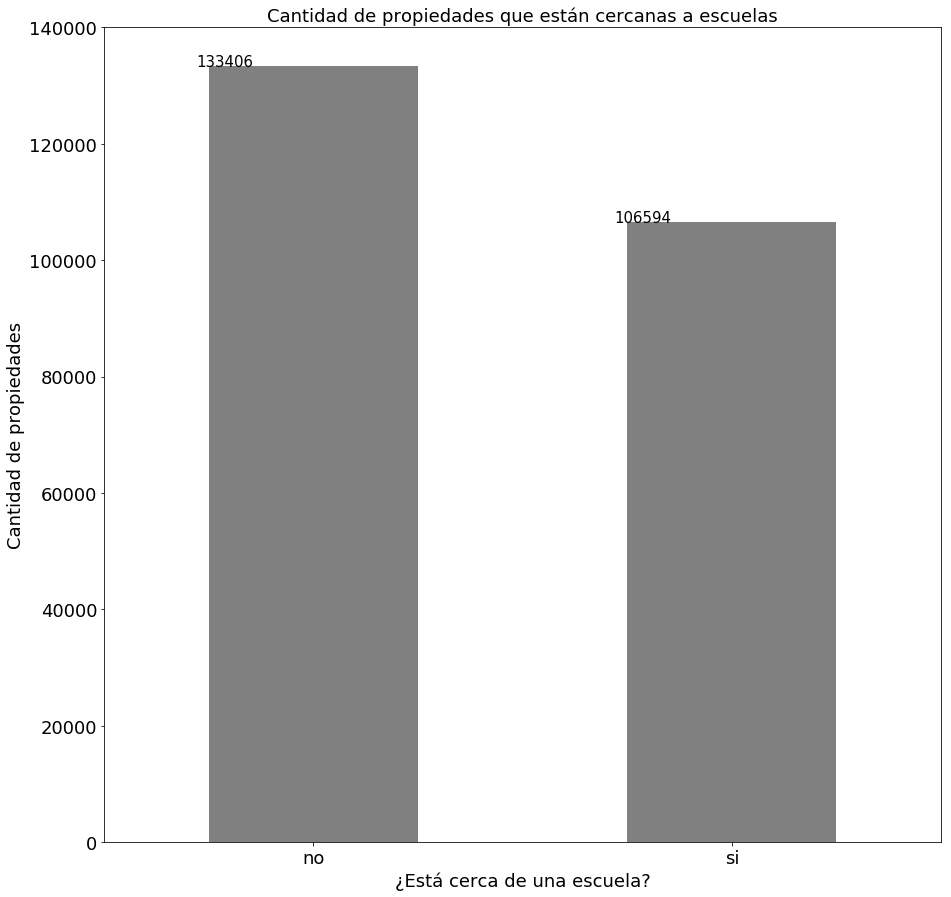

In [38]:
cantescuelas=dataframe['escuelascercanas'].value_counts()
barplot(datos=cantescuelas,color='grey',titulo='Cantidad de propiedades que están cercanas a escuelas',etiqueta_x='¿Está cerca de una escuela?',etiqueta_y='Cantidad de propiedades')


* Del análisis del gráfico se puede observar que hay más propiedades lejos de una escuela (133406), que propiedades cerca (106594)

### Análisis del atributo centroscomercialescercanos

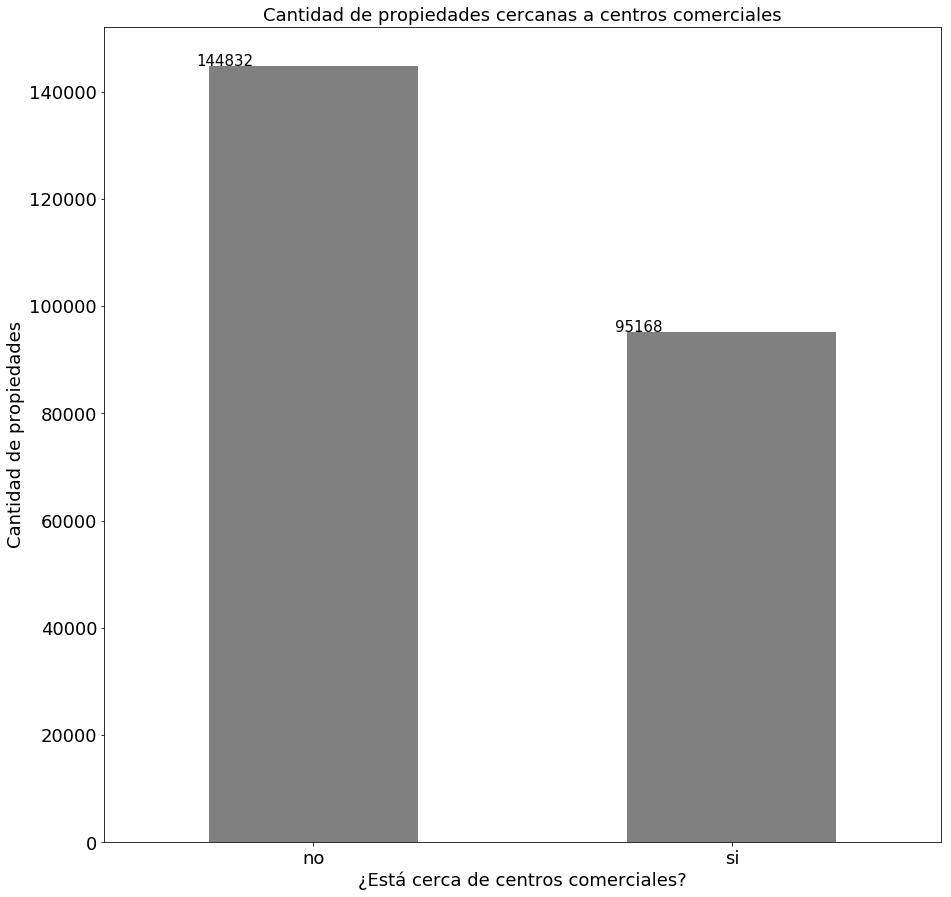

In [39]:
cantshoppings=dataframe['centroscomercialescercanos'].value_counts()
barplot(datos=cantshoppings,color='grey',titulo='Cantidad de propiedades cercanas a centros comerciales',etiqueta_x='¿Está cerca de centros comerciales?',etiqueta_y='Cantidad de propiedades')


* Del análisis del gráfico se puede observar que hay más propiedades lejos de centros comerciales (144832), que propiedades cerca (95168)

## Análisis más llamativos o relevantes

### Datos faltantes:
* Análizando el porcentaje de datos faltantes se pudo observar una cantidad demasiado grande de faltantes para los datos de longitud y latitud (faltan más de la mitad de los datos).
* Habrá que tener en cuenta que el peso de estos faltantes es muy grande, y las desiciones que se tomen con estos datos pueden influir mucho en el trabajo de análisis.
* También hay muchos datos faltantes de dirección y metros totales (aunque algo menor, solo un 20% aproximadamente)

### Intervalo de fechas de publicaciones:
* Las fechas de publicación van del primero de enero de 2012 al 31 de diciembre de 2016, es decir las publicaciones corresponden a un intervalo de 5 años

### Precios de publicaciones:
* La mayoría de las propiedades valen menos de 5000000, pero hay los valores de algunas propiedades que pueden llegar a valer 12000000

### Direcciones:
* En muchas publicaciones aparecen direcciones que no parecen aportar información. Por ejemplo aparecen: 660 publicaciones con dirección "-", 476 con dirección "." y 354 con dirección "Calle"

### Provincias:
* La mayor cantidad de propiedades se encuentran en el Distrito Federal (58790 propiedades), seguida de las que se encuentran en el Estado de México(416007). El Distrito Federal es la capital del pais, y el Estado de México limita con el Distrito Federal, siendo estas dos las provincias más pobladas del país. (fuente: https://es.wikipedia.org/wiki/Anexo:Entidades_federativas_de_M%C3%A9xico_por_superficie,_poblaci%C3%B3n_y_densidad)
* Luego la tercer provincia con más propiedades es Jalisco, pero los valores comienzan a caer a cifras mucho más pequeñas (Jalisco posee 21238 propiedades)
* La provincia con menos propiedades es Zacatecas, que solo posee 94 propiedades


### Características Basicas:
* La mayor parte de las propiedades son Casas (141717), seguida por los Apartamentos (57341)
* Las propiedades suelen tener entre 0 y 25 años de antiguedad y en muy pocos casos llegan a tener de 25 a 80 años. En promedio tienen 5 años de antiguedad.
* Las propiedades suelen tener entre 1 y 4 habitaciones y en muy pocos casos llegan a tener de 5 a 10 habitaciones. En promedio tienen 3 habitaciones.
* Las propiedades suelen tener como mínimo 0 garages, como máximo 3 garages y en promedio 2 garages.
* Las propiedades suelen tener como mínimo 1 baño, como máximo 4 baños y en promedio 2 baños.
* Los metros totales y metros cubiertos de la propiedades se encuentran dentro del rango 15 a 439

### Caraterísticas adicionales:
* La mayoría de las propiedades no tienen Gimnasio, ni SUM, ni Piscina